In [0]:
import numpy as np
import pandas as pd


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
cd /content/drive/My Drive/Colab Notebooks

/content/drive/My Drive/Colab Notebooks


In [5]:
import numpy as np
import os
import sys
import pandas as pd
import wave
import keras

Using TensorFlow backend.


In [0]:
from keras.models import load_model
from keras.preprocessing import sequence
from scipy import signal
from helper import *
from sklearn.preprocessing import LabelEncoder
from keras import backend as K

In [0]:
import os
import csv
import wave
import sys
import numpy as np
import pandas as pd
import glob


def split_wav(wav, emotions):
    (nchannels, sampwidth, framerate, nframes, comptype, compname), samples = wav

    left = samples[0::nchannels]
    
    for ie, e in enumerate(emotions):
        start = e['start']
        end = e['end']
        e['signal'] = left[int(start * framerate):int(end * framerate)]


def pad_sequence_into_array(Xs, maxlen,value=0.):
    
    Nsamples = len(Xs)

    Xout = np.ones(shape=[Nsamples, maxlen] + list(Xs[0].shape[1:]), dtype=Xs[0].dtype) * np.asarray(value, dtype=Xs[0].dtype)
    for i in range(Nsamples):
        x = Xs[i]
        trunc = x[:maxlen]
        Xout[i, :len(trunc)] = trunc
        
    return Xout


def get_audio(path_to_wav, filename):
    wav = wave.open(path_to_wav + filename, mode="r")
    (nchannels, sampwidth, framerate, nframes, comptype, compname) = wav.getparams()
    content = wav.readframes(nframes)
    samples = np.fromstring(content, dtype=np.int16)
    return (nchannels, sampwidth, framerate, nframes, comptype, compname), samples

def get_field(data, key):
    return np.array([e[key] for e in data])

def get_emotions(path_to_emotions, filename):
    f = open(path_to_emotions + filename, 'r').read()
    f = np.array(f.split('\n'))
    idx = f == ''
    idx_n = np.arange(len(f))[idx]
    emotion = []
    for i in range(len(idx_n) - 2):
        g = f[idx_n[i]+1:idx_n[i+1]]
        head = g[0]
        i0 = head.find(' - ')
        start_time = float(head[head.find('[') + 1:head.find(' - ')])
        end_time = float(head[head.find(' - ') + 3:head.find(']')])
        actor_id = head[head.find(filename[:-4]) + len(filename[:-4]) + 1:
                        head.find(filename[:-4]) + len(filename[:-4]) + 5]
        emo = head[head.find('\t[') - 3:head.find('\t[')]
        vad = head[head.find('\t[') + 1:]

        v = float(vad[1:7])
        a = float(vad[9:15])
        d = float(vad[17:23])
        
        j = 1
        emos = []
        while g[j][0] == "C":
            head = g[j]
            start_idx = head.find("\t") + 1
            evoluator_emo = []
            idx = head.find(";", start_idx)
            while idx != -1:
                evoluator_emo.append(head[start_idx:idx].strip().lower()[:3])
                start_idx = idx + 1
                idx = head.find(";", start_idx)
            emos.append(evoluator_emo)
            j += 1

        emotion.append({'start': start_time,
                        'end': end_time,
                        'id': filename[:-4] + '_' + actor_id,
                        'v': v,
                        'a': a,
                        'd': d,
                        'emotion': emo,
                        'emo_evo': emos})
    return emotion

In [8]:
import numpy as np
import os
import sys

import wave
import copy
import math

from helper import *



code_path = os.path.dirname(os.path.realpath(os.getcwd()))
emotions_used = np.array(['ang', 'exc', 'neu', 'sad'])
data_path ="F://iemocap_dataset//Sessions//"
Sessions = ['Session1', 'Session2', 'Session3', 'Session4', 'Session5']
framerate = 16000
print(code_path)

/content/drive/My Drive


In [0]:

def read_iemocap_mocap():
    data = []
    ids = {}
    for session in Sessions:
        path_to_wav = data_path + session+'/dialog/wav/'
        path_to_emotions = data_path +session+ '/dialog/EmoEvaluation/'

        files2 = os.listdir(path_to_wav)

        files = []
        for f in files2:
            if f.endswith(".wav"):
                if f[0] == '.':
                    files.append(f[2:-4])
                else:
                    files.append(f[:-4])
                    

        for f in files:       
            print(f)
            wav = get_audio(path_to_wav, f + '.wav')
            emotions = get_emotions(path_to_emotions, f + '.txt')
            split_wav(wav, emotions)

            for ie, e in enumerate(emotions):
                if e['emotion'] in emotions_used:
                    if e['id'] not in ids:
                        data.append(e)
                        ids[e['id']] = 1

                        
    sort_key = get_field(data, "id")
    return np.array(data)[np.argsort(sort_key)]
    



In [0]:
import pickle
with open(code_path + '/Colab Notebooks/'+'data_collected.pickle', 'rb') as handle:
    data2 = pickle.load(handle)

In [11]:
data2

array([{'start': 6.2901, 'end': 8.2357, 'id': 'Ses01F_impro01_F000', 'v': 2.5, 'a': 2.5, 'd': 2.5, 'emotion': 'neu', 'emo_evo': [['neu'], ['neu'], ['neu'], ['neu']], 'signal': array([-165, -163, -125, ..., -104, -137, -146], dtype=int16)},
       {'start': 10.01, 'end': 11.3925, 'id': 'Ses01F_impro01_F001', 'v': 2.5, 'a': 2.5, 'd': 2.5, 'emotion': 'neu', 'emo_evo': [['neu'], ['neu'], ['neu'], ['neu', 'ang']], 'signal': array([-31, -23, -18, ..., -42, -27, -12], dtype=int16)},
       {'start': 14.8872, 'end': 18.0175, 'id': 'Ses01F_impro01_F002', 'v': 2.5, 'a': 2.5, 'd': 2.5, 'emotion': 'neu', 'emo_evo': [['neu'], ['sur'], ['neu'], ['neu', 'ang']], 'signal': array([-12,  -5,  14, ...,  -6,  29,  41], dtype=int16)},
       ...,
       {'start': 246.59, 'end': 248.83, 'id': 'Ses05M_script03_2_M043', 'v': 1.5, 'a': 4.0, 'd': 4.5, 'emotion': 'ang', 'emo_evo': [['ang'], ['ang'], ['ang']], 'signal': array([-1025,  -629,  -577, ...,    29,    -8,     4], dtype=int16)},
       {'start': 255.86,

In [0]:
df=data2

In [13]:
!pip install python_speech_features  

  Created wheel for python-speech-features: filename=python_speech_features-0.6-cp36-none-any.whl size=5889 sha256=1e54364d6eee92c50b9709b144e70e4896d6f62c98381169d452ec2a8d5a0c9d
  Stored in directory: /root/.cache/pip/wheels/3c/42/7c/f60e9d1b40015cd69b213ad90f7c18a9264cd745b9888134be
Successfully built python-speech-features


In [0]:
from python_speech_features import mfcc
from python_speech_features import logfbank
import scipy.io.wavfile as wav

In [15]:
X_train = []
X_test = []
Y_train = []
Y_test = []
fs = 16e3
counter = 0
counter1 = 0
for ses_mod in data2:
    if 'impro' in ses_mod['id'] and ses_mod['emotion'] in emotions_used:
        f, t, Sxx = signal.spectrogram(ses_mod['signal'], fs, nperseg=400,noverlap=200)
        #print("lenpf sxx" + len(Sxx))
        Sxx = pad_sequence_into_array(Sxx,maxlen=300,value=0)
        
        if ses_mod['id'][:5]=="Ses05":
            counter+=1
            X_test.append(Sxx)
            Y_test.append(ses_mod['emotion'])
        else:
            counter1+=1
            X_train.append(Sxx)
            Y_train.append(ses_mod['emotion'])
        
print(counter)
print(counter1)

X_test = np.array(X_test)
X_train = np.array(X_train)


625
2034


In [16]:
Sxx

array([[3.0323859e-02, 1.2358341e-01, 1.4109485e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [1.4307711e+01, 2.4594305e+01, 4.6749401e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [4.9494896e+00, 1.0452117e+01, 3.7064857e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       ...,
       [1.6301174e-05, 1.5196559e-05, 3.0166143e-07, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [2.6281398e-06, 1.2804176e-05, 9.6234826e-06, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [1.0619109e-06, 1.4897130e-05, 4.2177341e-08, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00]], dtype=float32)

In [17]:
ses_mod['id']

'Ses05M_script03_2_M045'

Text(0.5, 0, 'Seconds')

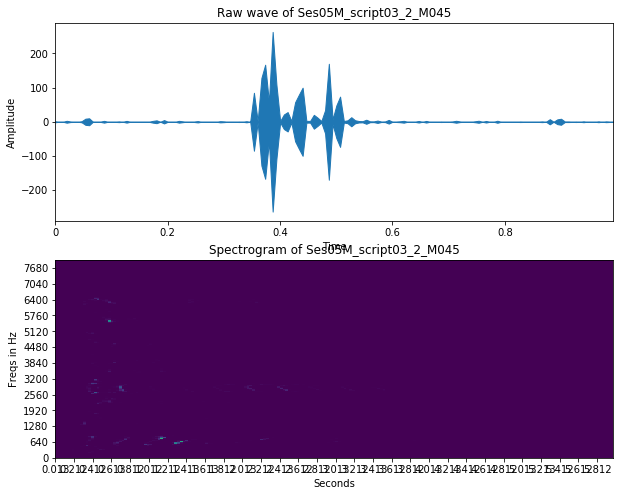

In [18]:
# Plotting Wave Form and Spectrogram
import librosa
import librosa.display
import matplotlib.pyplot as plt
freqs, times, spectrogram =signal.spectrogram(ses_mod['signal'], fs, nperseg=400,noverlap=200)

fig = plt.figure(figsize=(10, 8))
ax1 = fig.add_subplot(211)
ax1.set_title('Raw wave of ' + ses_mod['id'])
ax1.set_ylabel('Amplitude')
librosa.display.waveplot(X_train[0][0][0:150], sr=len(X_train[0][0][0:150]))

ax2 = fig.add_subplot(212)
ax2.imshow(spectrogram.T, aspect='auto', origin='lower', 
           extent=[times.min(), times.max(), freqs.min(), freqs.max()])
ax2.set_yticks(freqs[::16])
ax2.set_xticks(times[::16])
ax2.set_title('Spectrogram of ' + ses_mod['id'])
ax2.set_ylabel('Freqs in Hz')
ax2.set_xlabel('Seconds')

In [0]:
mean = np.mean(spectrogram, axis=0)
std = np.std(spectrogram, axis=0)
spectrogram = (spectrogram - mean) / std

In [20]:
# Trim the silence voice
aa , bb = librosa.effects.trim(X_train[0][0][0:150], top_db=30)
aa, bb

(array([1.44973803e+00, 2.28433101e-03, 1.24576213e-02, 2.78194857e+00,
        8.74307454e-01, 5.87257683e-01, 8.92082006e-02, 1.63661301e+00,
        9.01320934e+00, 1.01464148e+01, 7.85137061e-03, 2.31907284e-03,
        4.95655358e-01, 2.62660265e+00, 1.62631238e-03, 1.86546490e-01,
        5.78862965e-01, 1.11302388e+00, 1.56994134e-01, 2.55839634e+00,
        2.27605738e-02, 1.58828944e-01, 3.40808123e-01, 5.80329895e-01,
        1.56611833e-03, 2.71433264e-01, 2.58360076e+00, 4.16462183e+00,
        1.55153377e-02, 4.89365673e+00, 1.42914578e-01, 2.22419098e-01,
        1.86022416e-01, 2.64837646e+00, 1.20308542e+00, 4.56051156e-03,
        1.84121635e-02, 6.82715952e-01, 1.96210122e+00, 5.67696914e-02,
        7.16430366e-01, 4.06018160e-02, 7.12153256e-01, 1.67192459e-01,
        1.80244350e+00, 1.13288283e+00, 2.98497170e-01, 2.37900376e-01,
        3.41956586e-01, 8.22615743e-01, 2.44170502e-01, 1.61470044e+00,
        7.11154100e-03, 8.47729187e+01, 1.76156569e+00, 1.282904

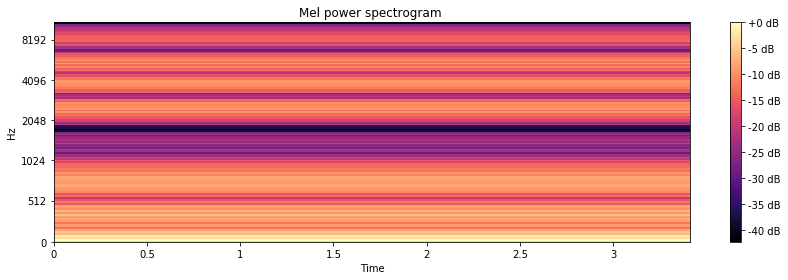

In [21]:
# Plotting Mel Power Spectrogram
S = librosa.feature.melspectrogram(aa, sr=len(X_train[0][0][0:150]), n_mels=128)

# Convert to log scale (dB). We'll use the peak power (max) as reference.
log_S = librosa.power_to_db(S, ref=np.max)

plt.figure(figsize=(12, 4))
librosa.display.specshow(log_S, sr=len(X_train[0][0][0:150]), x_axis='time', y_axis='mel')
plt.title('Mel power spectrogram ')
plt.colorbar(format='%+02.0f dB')
plt.tight_layout()

In [22]:
X_train[0][0][0:150].shape[-1]

150

In [23]:
print("Size of our training(Input features) set: ",X_train.shape)
print("Size of our test(Input features) set:       ",X_test.shape)
print("Size of our training(ouput features) set: ",len(Y_train))
print("Size of our test(ouput features) set:     ",len(Y_test))

Size of our training(Input features) set:  (2034, 201, 300)
Size of our test(Input features) set:        (625, 201, 300)
Size of our training(ouput features) set:  2034
Size of our test(ouput features) set:      625


In [24]:
print(Y_train)

['neu', 'neu', 'neu', 'neu', 'ang', 'neu', 'ang', 'ang', 'sad', 'sad', 'sad', 'neu', 'sad', 'sad', 'neu', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'neu', 'sad', 'neu', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'neu', 'sad', 'sad', 'neu', 'exc', 'neu', 'neu', 'neu', 'neu', 'neu', 'neu', 'neu', 'exc', 'neu', 'neu', 'neu', 'neu', 'neu', 'neu', 'neu', 'neu', 'exc', 'neu', 'neu', 'neu', 'neu', 'neu', 'neu', 'neu', 'neu', 'ang', 'ang', 'ang', 'ang', 'ang', 'ang', 'neu', 'neu', 'neu', 'neu', 'neu', 'neu', 'neu', 'neu', 'neu', 'neu', 'neu', 'neu', 'neu', 'neu', 'neu', 'neu', 'neu', 'neu', 'neu', 'neu', 'neu', 'neu', 'neu', 'neu', 'neu', 'neu', 'neu', 'neu', 'neu', 'neu', 'neu', 'ang', 'ang', 'ang', 'ang', 'ang', 'ang', 'ang', 'ang', 'ang', 'ang', 'ang', 'ang', 'ang', 'ang', 'ang', 'ang', 'ang', 'ang', 'ang', 'ang', 'neu', 'neu', 'neu', 'neu', 'neu', 'neu', 'neu', 'neu', 'neu', 'neu', 'neu', 'neu', 'neu', 'neu', 'neu', 'neu', 'neu', 'neu', 'neu', 'neu', 'neu', 'neu', 'neu', 'neu', 'neu'

In [25]:
print(Y_test)

['neu', 'neu', 'ang', 'ang', 'ang', 'neu', 'neu', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'neu', 'ang', 'ang', 'ang', 'ang', 'ang', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'exc', 'exc', 'exc', 'exc', 'exc', 'exc', 'exc', 'exc', 'exc', 'exc', 'exc', 'exc', 'exc', 'exc', 'exc', 'exc', 'exc', 'exc', 'exc', 'exc', 'exc', 'exc', 'exc', 'exc', 'exc', 'exc', 'exc', 'exc', 'exc', 'exc', 'exc', 'exc', 'exc', 'exc', 'exc', 'exc', 'exc', 'exc', 'exc', 'exc', 'exc', 'sad', 'ang', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'neu', 'neu', 'neu', 'neu', 'sad', 'neu', 'neu', 'neu', 'neu', 'neu', 'neu', 'neu', 'neu', 'neu', 'neu', 'neu', 'neu', 'neu', 'neu', 'neu', 'neu', 'neu', 'neu', 'neu', 'neu', 'neu', 'neu', 'neu', 'neu', 'neu', 'neu', 'neu', 'neu', 'neu', 'neu', 'neu', 'neu', 'neu', 'neu', 'neu', 'neu', 'neu', 'neu', 'neu', 'neu', 'neu', 'neu', 'neu'

In [26]:
y  = pd.get_dummies(Y_train+Y_test)
y.tail()

,ang,exc,neu,sad
2654,0,0,1,0
2655,0,0,1,0
2656,0,0,1,0
2657,0,0,1,0
2658,0,0,1,0


In [27]:
y1=pd.get_dummies(Y_test)
y1.head()

,ang,exc,neu,sad
0,0,0,1,0
1,0,0,1,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0


In [28]:
len(y)

2659

In [0]:
res=y.loc[y['ang']==1]
l1=len(res)
res2=y.loc[y['exc']==1]
l2=len(res2)
res3=y.loc[y['neu']==1]
l3=len(res3)
res4=y.loc[y['sad']==1]
l4=len(res4)


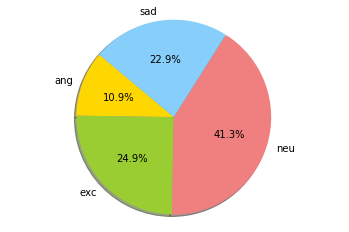

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
emo_name = [ 'ang','exc','neu','sad']
emo_number = [289,663,1099,608]
plt.pie(emo_number, labels=emo_name, colors=['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'red', 'olive'],
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()

In [0]:
y_train = y[0:len(Y_train)]
y_test = y[len(Y_train):]
y_train = np.array(y_train)
y_test = np.array(y_test)

In [32]:
y_train

array([[0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       ...,
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0]], dtype=uint8)

In [33]:
y_test

array([[0, 0, 1, 0],
       [0, 0, 1, 0],
       [1, 0, 0, 0],
       ...,
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0]], dtype=uint8)

In [34]:
X_train[0][0][:10]


array([1.4497380e+00, 2.2843310e-03, 1.2457621e-02, 2.7819486e+00,
       8.7430745e-01, 5.8725768e-01, 8.9208201e-02, 1.6366130e+00,
       9.0132093e+00, 1.0146415e+01], dtype=float32)

In [35]:
X_train.shape

(2034, 201, 300)

In [0]:
from keras.models import Sequential,Model
from keras.layers.core import Dense,Activation
from keras.layers import LSTM,Input,Flatten,Dropout,GlobalAveragePooling2D,MaxPooling2D
from keras.layers.convolutional import Conv2D

In [0]:
def lstm_model():
    model = Sequential()
    model.add(LSTM(256, return_sequences=True, input_shape=(201, 300)))
    model.add(LSTM(256, return_sequences=False))
    model.add(Dense(512))
    model.add(Activation('relu'))
    model.add(Dense(4))
    model.add(Activation('softmax'))

    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    return model

In [38]:
model=lstm_model()
print(model.summary())






Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 201, 256)          570368    
_________________________________________________________________
lstm_2 (LSTM)                (None, 256)               525312    
_________________________________________________________________
dense_1 (Dense)              (None, 512)               131584    
_________________________________________________________________
activation_1 (Activation)    (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 2052      
_________________________________________________________________
activation_2 (Activation)    (None, 4)                 0         
Total params: 1,229,316
Trainable params: 1,229,316
Non-trainable params: 0
_______________________________________

In [0]:
from keras.utils import plot_model
plot_model(model, to_file='shared_input_layer.png')

In [39]:
his1t = model.fit(X_train,y_train, 
                 batch_size=32, nb_epoch=50, verbose=1, shuffle = True, 
                 validation_data=(X_test,y_test))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  This is separate from the ipykernel package so we can avoid doing imports until





Train on 2034 samples, validate on 625 samples
Epoch 1/50





2034/2034 [==============================] - 71s 35ms/step - loss: 1.2596 - acc: 0.4331 - val_loss: 1.1507 - val_acc: 0.4512
Epoch 2/50
2034/2034 [==============================] - 62s 31ms/step - loss: 1.1294 - acc: 0.5029 - val_loss: 1.1321 - val_acc: 0.4560
Epoch 3/50
2034/2034 [==============================] - 61s 30ms/step - loss: 1.1039 - acc: 0.5246 - val_loss: 1.1129 - val_acc: 0.5168
Epoch 4/50
2034/2034 [==============================] - 61s 30ms/step - loss: 1.0778 - acc: 0.5344 - val_loss: 1.1981 - val_acc: 0.4368
Epoch 5/50
2034/2034 [==============================] - 60s 30ms/step - loss: 1.0417 - acc: 0.5639 - val_loss: 1.1557 - val_acc: 0.4896
Epoch 6/50
2034/2034 [==============================] - 62s 31ms/step - loss: 0.9919 - acc: 0.5885 - val_loss: 1.1731 - val_acc: 0.4688
Epoch 7/50
2034/2034 [==============================] - 63s 31ms/step - loss: 0.9549 - acc: 0.6214 - val_loss: 1.2065 - val_acc: 

In [40]:
score, acc = model.evaluate(X_test, y_test,
                       batch_size=32, verbose=2)

print('Test accuracy:', acc)

Test accuracy: 0.43200000066757205


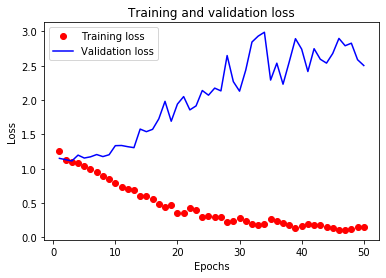

In [43]:
loss = his1t.history['loss']
val_loss = his1t.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'ro', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

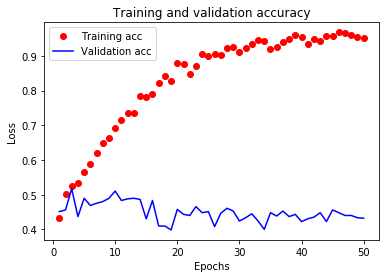

In [44]:
plt.clf()                                                

acc = his1t.history['acc']
val_acc = his1t.history['val_acc']

plt.plot(epochs, acc, 'ro', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [0]:
X_train = X_train.reshape(-1,201,300,1)
X_test = X_test.reshape(-1,201,300,1)

In [0]:
"def make_model():
    in_layer = Input(shape=(201, 300,1))
    x = Conv2D(32,(5,5), activation = 'relu')(in_layer)  
    x = Dropout(0.5)(x)
    x = Conv2D(64,(5,5), activation = 'relu')(x)         
    x = Dropout(0.5)(x)
    x = Conv2D(128, (5,5))(x)                           
    x = GlobalAveragePooling2D()(x)                    
    x = Dense(64,activation='relu')(x)
    x = Dropout(0.5)(x)
    output_layer = Dense(4, activation = "softmax")(x) 
    model = Model(inputs = in_layer, outputs=output_layer)
    return model

In [0]:
model=make_model()
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         (None, 201, 300, 1)       0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 197, 296, 32)      832       
_________________________________________________________________
dropout_17 (Dropout)         (None, 197, 296, 32)      0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 193, 292, 64)      51264     
_________________________________________________________________
dropout_18 (Dropout)         (None, 193, 292, 64)      0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 189, 288, 128)     204928    
_________________________________________________________________
global_average_pooling2d_6 ( (None, 128)               0         
__________

In [0]:
model  =  make_model()
model.compile(optimizer = "adam", loss = "categorical_crossentropy",
                    metrics=["accuracy"])
hist2= model.fit(X_train, y_train, 
                 batch_size=32, validation_data=(X_test,y_test),epochs=20, verbose=1, shuffle = True, 
                )

Train on 2034 samples, validate on 625 samples
Epoch 1/20
2034/2034 [==============================] - 30s 15ms/step - loss: 3.9519 - acc: 0.3668 - val_loss: 1.3826 - val_acc: 0.2128
Epoch 2/20
2034/2034 [==============================] - 29s 14ms/step - loss: 1.3528 - acc: 0.3466 - val_loss: 1.2853 - val_acc: 0.4592
Epoch 3/20
2034/2034 [==============================] - 29s 14ms/step - loss: 1.3163 - acc: 0.4041 - val_loss: 1.2479 - val_acc: 0.4592
Epoch 4/20
2034/2034 [==============================] - 29s 14ms/step - loss: 1.3052 - acc: 0.4110 - val_loss: 1.2342 - val_acc: 0.4592
Epoch 5/20
2034/2034 [==============================] - 29s 14ms/step - loss: 1.3174 - acc: 0.4086 - val_loss: 1.2335 - val_acc: 0.4592
Epoch 6/20
2034/2034 [==============================] - 29s 14ms/step - loss: 1.3207 - acc: 0.4208 - val_loss: 1.2295 - val_acc: 0.4592
Epoch 7/20
2034/2034 [==============================] - 30s 15ms/step - loss: 1.2874 - acc: 0.4145 - val_loss: 1.2398 - val_acc: 0.4592
E

In [0]:
score, acc = model.evaluate(X_test, y_test,
                       batch_size=32, verbose=2)

print('Test accuracy:', acc)

Test accuracy: 0.4976000005722046


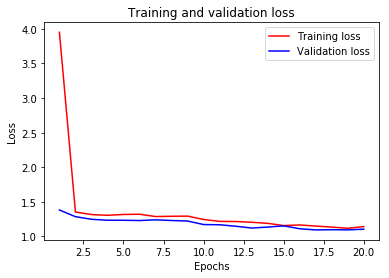

In [0]:
loss = hist2.history['loss']
val_loss = hist2.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

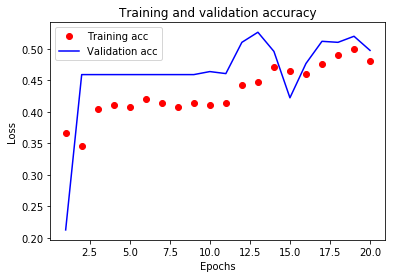

In [0]:
### accuracy plots using model A
plt.clf()                                                

acc = hist2.history['acc']
val_acc = hist2.history['val_acc']

plt.plot(epochs, acc, 'ro', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [0]:
def categorical_focal_loss(gamma=2., alpha=.25):
    """
    Softmax version of focal loss.
           m
      FL = ∑  -alpha * (1 - p_o,c)^gamma * y_o,c * log(p_o,c)
          c=1
      where m = number of classes, c = class and o = observation
    Parameters:
      alpha -- the same as weighing factor in balanced cross entropy
      gamma -- focusing parameter for modulating factor (1-p)
    Default value:
      gamma -- 2.0 as mentioned in the paper
      alpha -- 0.25 as mentioned in the paper
    References:
        Official paper: https://arxiv.org/pdf/1708.02002.pdf
        https://www.tensorflow.org/api_docs/python/tf/keras/backend/categorical_crossentropy
    Usage:
     model.compile(loss=[categorical_focal_loss(alpha=.25, gamma=2)], metrics=["accuracy"], optimizer=adam)
    """
    def categorical_focal_loss_fixed(y_true, y_pred):
        """
        :param y_true: A tensor of the same shape as `y_pred`
        :param y_pred: A tensor resulting from a softmax
        :return: Output tensor.
        """

        # Scale predictions so that the class probas of each sample sum to 1
        y_pred /= K.sum(y_pred, axis=-1, keepdims=True)

        # Clip the prediction value to prevent NaN's and Inf's
        epsilon = K.epsilon()
        y_pred = K.clip(y_pred, epsilon, 1. - epsilon)

        # Calculate Cross Entropy
        cross_entropy = -y_true * K.log(y_pred)

        # Calculate Focal Loss
        loss = alpha * K.pow(1 - y_pred, gamma) * cross_entropy

        # Sum the losses in mini_batch
        return K.sum(loss, axis=1)

    return categorical_focal_loss_fixed

In [0]:
model  =  make_model()
model.compile(optimizer = "adam", loss = [categorical_focal_loss(gamma=2., alpha=.25)],
                    metrics=["accuracy"])
hist3= model.fit(X_train, y_train, 
                 batch_size=32, validation_data=(X_test,y_test),nb_epoch=20, verbose=1, shuffle = True, 
                )

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """


Train on 2034 samples, validate on 625 samples
Epoch 1/20
2034/2034 [==============================] - 32s 16ms/step - loss: 0.9598 - acc: 0.3102 - val_loss: 0.1790 - val_acc: 0.4592
Epoch 2/20
2034/2034 [==============================] - 30s 15ms/step - loss: 0.1799 - acc: 0.4086 - val_loss: 0.1648 - val_acc: 0.4592
Epoch 3/20
2034/2034 [==============================] - 30s 15ms/step - loss: 0.1757 - acc: 0.4110 - val_loss: 0.1636 - val_acc: 0.4592
Epoch 4/20
2034/2034 [==============================] - 30s 15ms/step - loss: 0.1821 - acc: 0.4095 - val_loss: 0.1637 - val_acc: 0.4592
Epoch 5/20
2034/2034 [==============================] - 30s 15ms/step - loss: 0.1775 - acc: 0.4105 - val_loss: 0.1641 - val_acc: 0.4592
Epoch 6/20
2034/2034 [==============================] - 30s 15ms/step - loss: 0.1735 - acc: 0.4086 - val_loss: 0.1594 - val_acc: 0.4624
Epoch 7/20
2034/2034 [==============================] - 30s 15ms/step - loss: 0.1742 - acc: 0.4213 - val_loss: 0.1612 - val_acc: 0.4592
E

In [0]:
score, acc = model.evaluate(X_test, y_test,
                       batch_size=32, verbose=2)

print('Test accuracy:', acc)

Test accuracy: 0.5168000000953674


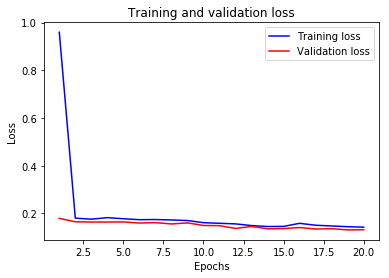

In [0]:
loss = hist3.history['loss']
val_loss = hist3.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

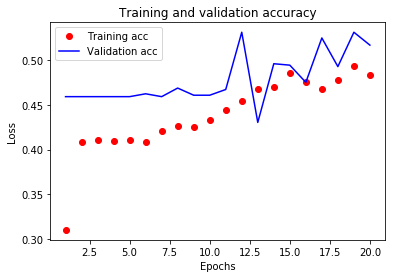

In [0]:
### accuracy plots using model C
plt.clf()                                                

acc = hist3.history['acc']
val_acc = hist3.history['val_acc']

plt.plot(epochs, acc, 'ro', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [0]:
def make_model():
    in_layer = Input(shape=(201, 300,1))
    x = Conv2D(16,(5,5), activation = 'elu')(in_layer)  
    x = Dropout(0.5)(x)
    x = Conv2D(32,(5,5), activation = 'elu')(x)         
    x = Dropout(0.5)(x)
    x = Conv2D(64, (5,5))(x)                           
    x = GlobalAveragePooling2D()(x)                     
    x = Dense(64,activation='relu')(x)
    x = Dropout(0.5)(x)
    output_layer = Dense(4, activation = "softmax")(x) 
    model = Model(inputs = in_layer, outputs=output_layer)
    return model

In [0]:
model  =  make_model()
model.compile(optimizer = "adam", loss = "categorical_crossentropy",
                    metrics=["accuracy"])
hist4 = model.fit(X_train, y_train, 
                 batch_size=32, validation_data=(X_test,y_test),nb_epoch=20, verbose=1, shuffle = True, 
                )

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """


Train on 2034 samples, validate on 625 samples
Epoch 1/20
2034/2034 [==============================] - 17s 9ms/step - loss: 2.8736 - acc: 0.3805 - val_loss: 1.2382 - val_acc: 0.4592
Epoch 2/20
2034/2034 [==============================] - 16s 8ms/step - loss: 1.2914 - acc: 0.4513 - val_loss: 1.1067 - val_acc: 0.5792
Epoch 3/20
2034/2034 [==============================] - 16s 8ms/step - loss: 1.1700 - acc: 0.4671 - val_loss: 1.0786 - val_acc: 0.5488
Epoch 4/20
2034/2034 [==============================] - 16s 8ms/step - loss: 1.1320 - acc: 0.4695 - val_loss: 1.0622 - val_acc: 0.5328
Epoch 5/20
2034/2034 [==============================] - 16s 8ms/step - loss: 1.0909 - acc: 0.5054 - val_loss: 1.0252 - val_acc: 0.5584
Epoch 6/20
2034/2034 [==============================] - 16s 8ms/step - loss: 1.1010 - acc: 0.5005 - val_loss: 1.0328 - val_acc: 0.5648
Epoch 7/20
2034/2034 [==============================] - 16s 8ms/step - loss: 1.0820 - acc: 0.5138 - val_loss: 1.0617 - val_acc: 0.5264
Epoch 8/

In [0]:
score, acc = model.evaluate(X_test, y_test,
                       batch_size=32, verbose=2)

print('Test accuracy:', acc)

Test accuracy: 0.592


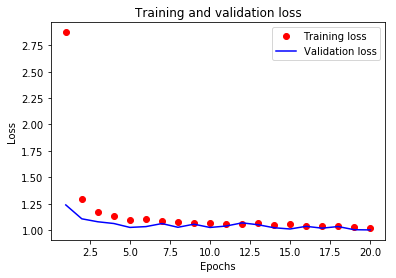

In [0]:
loss = hist4.history['loss']
val_loss = hist4.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'ro', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

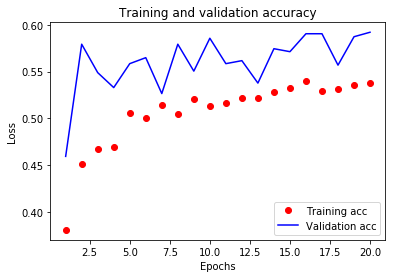

In [0]:
### accuracy plots using model C
plt.clf()                                                

acc = hist4.history['acc']
val_acc = hist4.history['val_acc']

plt.plot(epochs, acc, 'ro', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [0]:

def make_model():
    in_layer = Input(shape=(201, 300,1))
    x = Conv2D(32,(5,5), activation = 'elu')(in_layer)  
    x = Dropout(0.5)(x)
    x = Conv2D(64,(5,5), activation = 'elu')(x)         
    x = Dropout(0.5)(x)
    x = Conv2D(64,(5,5), activation = 'elu')(x)         
    x = Dropout(0.5)(x)
    x = Conv2D(128, (5,5))(x)                           
    x = GlobalAveragePooling2D()(x) 
    x = Dense(64,activation='elu')(x)
    x = Dropout(0.5)(x)
    output_layer = Dense(4, activation = "softmax")(x) # softmax output
    model = Model(inputs = in_layer, outputs=output_layer)
    return model

In [47]:
model  =  make_model()
model.compile(optimizer = "adam", loss = "categorical_crossentropy",
                    metrics=["accuracy"])
m_check = keras.callbacks.ModelCheckpoint(filepath = './cnn_spectrogram.h5', monitor='val_acc', save_best_only=True, mode='max', verbose=1 )
hist5= model.fit(X_train, y_train, 
                 batch_size=32, validation_data=(X_test,y_test),nb_epoch=40, verbose=1, shuffle = True,callbacks=[m_check] 
                )

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 2034 samples, validate on 625 samples
Epoch 1/40
2034/2034 [==============================] - 108s 53ms/step - loss: 2.8594 - acc: 0.3963 - val_loss: 1.1799 - val_acc: 0.4320

Epoch 00001: val_acc improved from -inf to 0.43200, saving model to ./cnn_spectrogram.h5
Epoch 2/40
2034/2034 [==============================] - 86s 42ms/step - loss: 1.3203 - acc: 0.4415 - val_loss: 1.0878 - val_acc: 0.5504

Epoch 00002: val_acc improved from 0.43200 to 0.55040, saving model to ./cnn_spectrogram.h5
Epoch 3/40
2034/2034 [==============================] - 87s 43ms/step - loss: 1.1928 - acc: 0.4887 - val_loss: 1.1940 - val_acc: 0.4720

Epoch 00003: val_acc did not improve from 0.55040
Epoch 4/40
2034/2034 [==============================] - 86s 42ms/step - loss: 1.1758 - acc: 0.4774 - val_loss: 1.1000 - val_acc: 0.4912

Epoch 00004: val_acc did not improve from 0.55040
Epoch 5/40
2034/2034 [==============================] - 86s 42ms/step - loss: 1.1375 - acc: 0.4897 - val_loss: 1.0334 - val

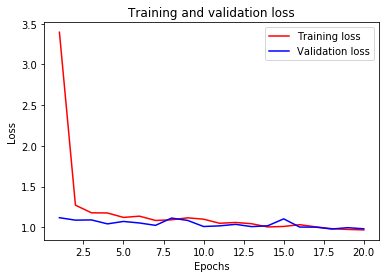

In [0]:
loss = hist5.history['loss']
val_loss = hist5.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

ValueError: ignored

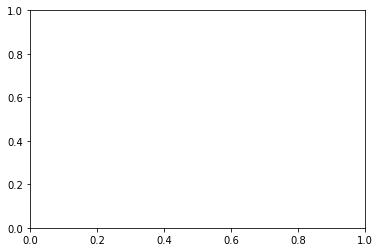

In [48]:
### accuracy plots using model C
plt.clf()                                                

acc = hist5.history['acc']
val_acc = hist5.history['val_acc']

plt.plot(epochs, acc, 'ro', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [49]:
score, acc = model.evaluate(X_test, y_test,
                       batch_size=32, verbose=2)

print('Test accuracy:', acc)

Test accuracy: 0.5920000000953675


In [0]:
best_model = load_model('./cnn_spectrogram.h5')

In [0]:
y_pred = best_model.predict(X_test)

In [0]:
from sklearn.metrics import classification_report, accuracy_score

In [0]:
for i in range(len(y_pred)):
  for j in range(len(y_pred[i])) :
    if y_pred[i][j]==max(y_pred[i]) :
      y_pred[i][j] = 1
    else:
      y_pred[i][j]=0

In [0]:
print(y_pred)

[[0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 ...
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]]


In [0]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        31
           1       0.68      0.33      0.45       174
           2       0.60      0.83      0.70       287
           3       0.66      0.71      0.68       133

   micro avg       0.63      0.63      0.63       625
   macro avg       0.49      0.47      0.46       625
weighted avg       0.61      0.63      0.59       625
 samples avg       0.63      0.63      0.63       625



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [0]:
accuracy_score(y_pred, y_test)

0.6256

In [0]:
y_pred

array([[0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.]], dtype=float32)

In [0]:
y_pred= pd.DataFrame(y_pred, columns = ['ang','exc','neu','sad'],dtype=int)
y_pred.tail()

,ang,exc,neu,sad
620,0,0,1,0
621,0,0,1,0
622,0,0,1,0
623,0,0,1,0
624,0,0,1,0


In [0]:
model = best_model

In [0]:
model

In [0]:
from keras.models import Model

layer_name = 'global_average_pooling2d_7'
intermediate_layer_model = Model(inputs=model.input,
                                 outputs=model.layers[8].output)
output_train = intermediate_layer_model.predict(X_train)
output_test =  intermediate_layer_model.predict(X_test)


In [0]:
print(len(output_train))
print(len(output_test))
print(len(y_train))

2034
625
2034


In [0]:
labelencoder = LabelEncoder()
y_train = labelencoder.fit_transform(Y_train)
y_test = labelencoder.transform(Y_test)

In [0]:
import pandas as pd 
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier()
abc.fit(output_train,y_train)
y_pred=abc.predict(output_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.28      0.23      0.25        31
           1       0.50      0.38      0.43       174
           2       0.56      0.59      0.58       287
           3       0.52      0.64      0.57       133

    accuracy                           0.52       625
   macro avg       0.46      0.46      0.46       625
weighted avg       0.52      0.52      0.52       625



In [0]:

from sklearn.linear_model import LogisticRegression
log=LogisticRegression()
log.fit(output_train,y_train)
y_pred=log.predict(output_test)
print(classification_report(y_test,y_pred))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


              precision    recall  f1-score   support

           0       0.70      0.23      0.34        31
           1       0.85      0.20      0.33       174
           2       0.57      0.89      0.69       287
           3       0.73      0.68      0.70       133

    accuracy                           0.62       625
   macro avg       0.71      0.50      0.52       625
weighted avg       0.69      0.62      0.57       625



In [0]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.70      0.23      0.34        31
           1       0.85      0.20      0.33       174
           2       0.57      0.89      0.69       287
           3       0.73      0.68      0.70       133

    accuracy                           0.62       625
   macro avg       0.71      0.50      0.52       625
weighted avg       0.69      0.62      0.57       625



In [0]:
from sklearn.model_selection import GridSearchCV
parameters = {'C': [1,10,20,30,40,50],}
grid_search = GridSearchCV(estimator = classifier,param_grid = parameters, scoring = 'accuracy',cv = 10,n_jobs = -1)
grid_search = grid_search.fit(output_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
best_parameters


{'C': 10}

In [0]:
log=LogisticRegression(C=10)
log.fit(output_train,y_train)
y_pred=log.predict(output_test)
print(classification_report(y_test,y_pred))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


              precision    recall  f1-score   support

           0       0.55      0.19      0.29        31
           1       0.77      0.23      0.35       174
           2       0.57      0.91      0.70       287
           3       0.76      0.62      0.68       133

    accuracy                           0.62       625
   macro avg       0.66      0.49      0.51       625
weighted avg       0.67      0.62      0.58       625



In [0]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(output_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [0]:
y_pred = knn.predict(output_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.14      0.23      0.17        31
           1       0.42      0.32      0.36       174
           2       0.61      0.67      0.64       287
           3       0.65      0.65      0.65       133

    accuracy                           0.54       625
   macro avg       0.46      0.46      0.46       625
weighted avg       0.54      0.54      0.54       625



In [0]:
from sklearn.model_selection import GridSearchCV
parameters = {'n_neighbors':[5,10,15,20,25,30,35,40]}
grid_search = GridSearchCV(estimator = knn,param_grid = parameters,scoring = 'accuracy',cv = 10,n_jobs = -1)
grid_search = grid_search.fit(output_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
best_parameters

{'n_neighbors': 30}

In [0]:
knn = KNeighborsClassifier(n_neighbors=30)
knn.fit(output_train,y_train)
y_pred = knn.predict(output_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.17      0.13      0.15        31
           1       0.50      0.29      0.37       174
           2       0.59      0.77      0.67       287
           3       0.68      0.66      0.67       133

    accuracy                           0.58       625
   macro avg       0.49      0.46      0.46       625
weighted avg       0.57      0.58      0.56       625



In [0]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(output_train,y_train)
y_pred = gnb.predict(output_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.32      0.29      0.31        31
           1       0.73      0.22      0.34       174
           2       0.57      0.56      0.56       287
           3       0.44      0.86      0.58       133

    accuracy                           0.52       625
   macro avg       0.51      0.48      0.45       625
weighted avg       0.57      0.52      0.49       625



In [0]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(output_train,y_train)
y_pred = dtc.predict(output_test)
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.14      0.29      0.19        31
           1       0.41      0.33      0.37       174
           2       0.54      0.52      0.53       287
           3       0.55      0.61      0.58       133

    accuracy                           0.47       625
   macro avg       0.41      0.44      0.41       625
weighted avg       0.49      0.47      0.48       625



In [0]:
depths = np.arange(1, 21)
num_leafs = [1, 5, 10, 20, 50, 100]
from sklearn.model_selection import GridSearchCV
parameters = {'max_depth':depths,'min_samples_leaf':num_leafs}
grid_search = GridSearchCV(estimator = dtc,param_grid = parameters,scoring = 'accuracy',cv = 10,n_jobs = -1)
grid_search = grid_search.fit(output_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
best_parameters


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'max_depth': 6, 'min_samples_leaf': 1}

In [0]:
dtc=DecisionTreeClassifier(max_depth=6,min_samples_leaf=1)
dtc.fit(output_train,y_train)
y_pred = dtc.predict(output_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.27      0.13      0.17        31
           1       0.50      0.41      0.45       174
           2       0.59      0.74      0.66       287
           3       0.72      0.59      0.65       133

    accuracy                           0.58       625
   macro avg       0.52      0.47      0.48       625
weighted avg       0.58      0.58      0.57       625



In [0]:
from xgboost import XGBClassifier
from xgboost import plot_importance
from sklearn.feature_selection import SelectFromModel
import matplotlib.pyplot as plt

In [0]:
xg_model = XGBClassifier(n_estimators=100,learning_rate=0.2,max_depth=7,objective = 'multi:softmax',num_class=4,n_jobs=-1)

In [0]:
xg_model.fit(output_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.2, max_delta_step=0, max_depth=7,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=-1,
              nthread=None, num_class=4, objective='multi:softprob',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=None, silent=None, subsample=1, verbosity=1)

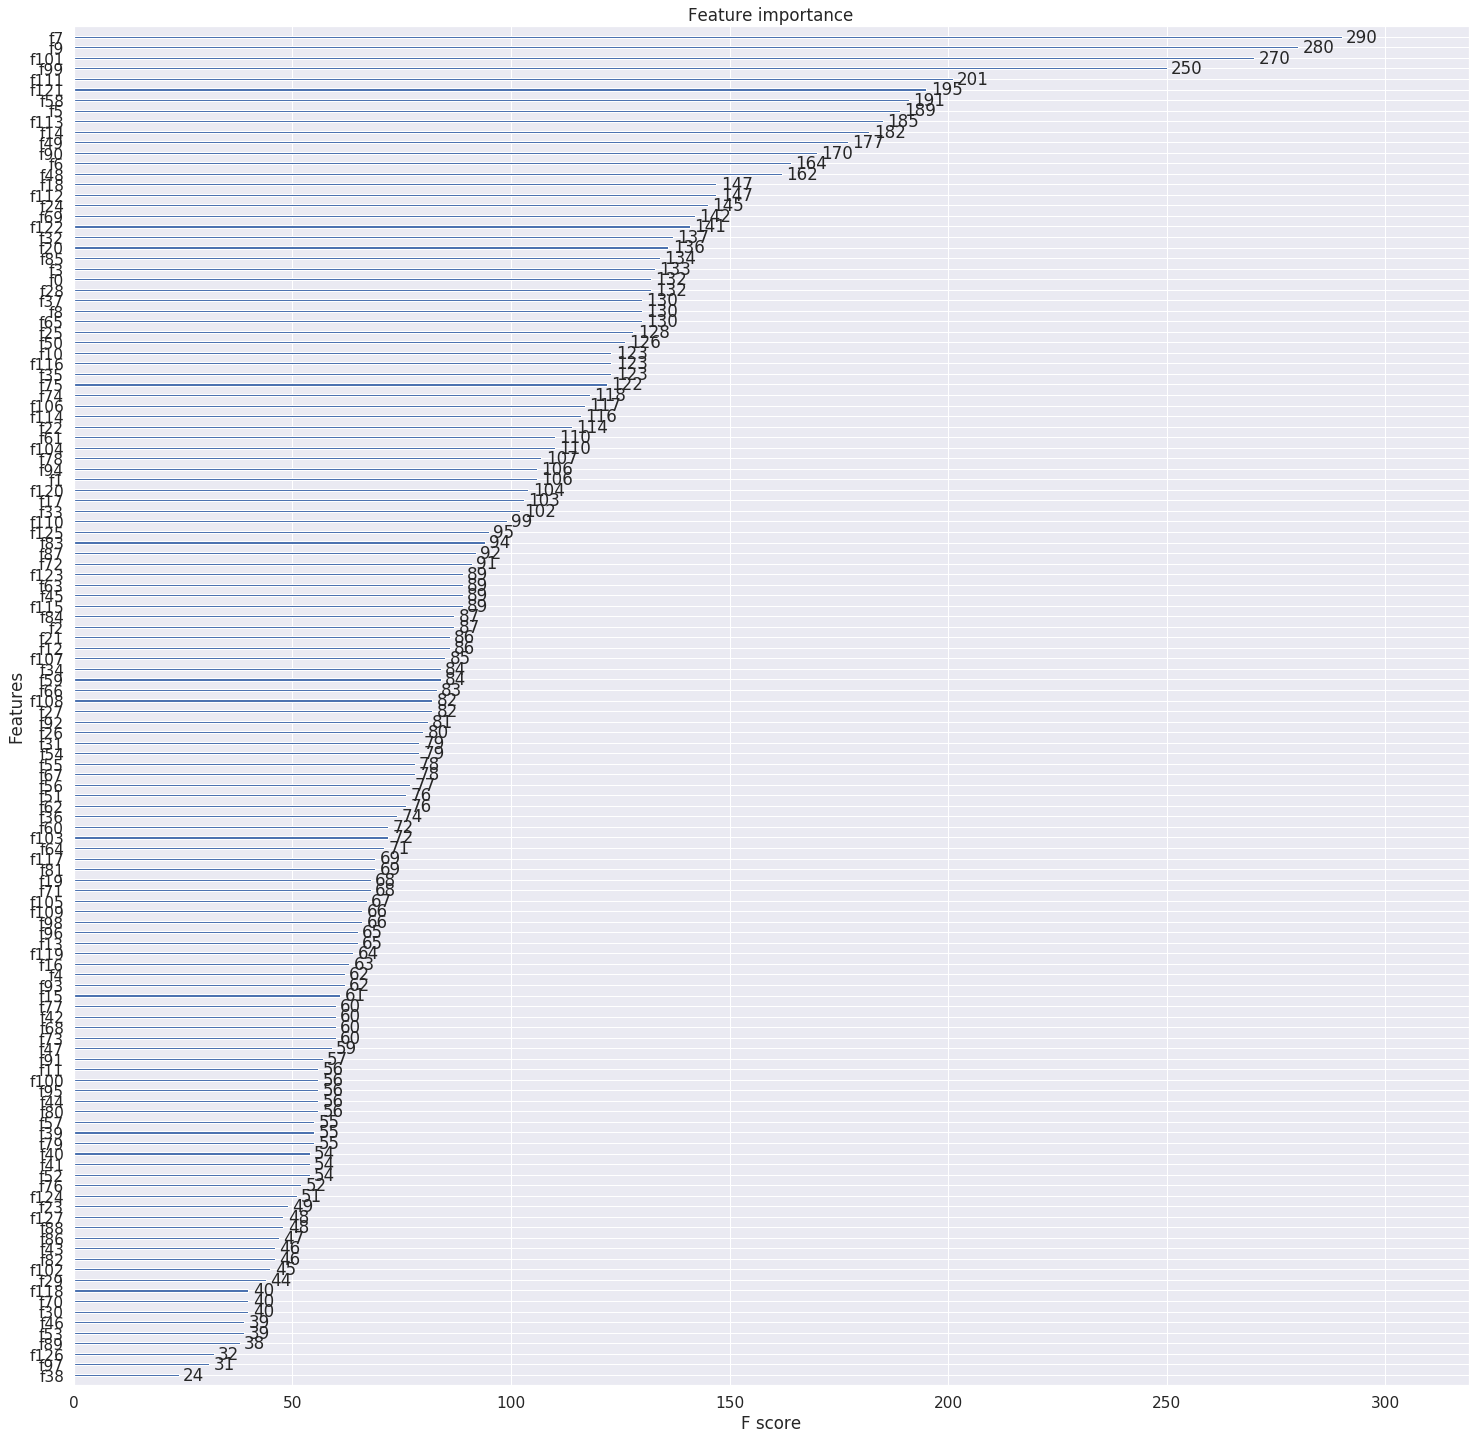

In [0]:
plt.rcParams["figure.figsize"] = (25, 25)
plot_importance(xg_model)
plt.show()

In [0]:
thresholds = np.sort(xg_model.feature_importances_)

In [0]:
# select features using threshold
selection = SelectFromModel(xg_model, threshold=0.005, prefit=True)
X_train = selection.transform(output_train)
X_test = selection.transform(output_test)

In [0]:
xg_model1 = XGBClassifier(n_estimators=100,learning_rate=0.2,max_depth=7,objective = 'multi:softmax',
                       num_class=4,n_jobs=-1)

In [0]:

xg_model1.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.2, max_delta_step=0, max_depth=7,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=-1,
              nthread=None, num_class=4, objective='multi:softprob',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=None, silent=None, subsample=1, verbosity=1)

In [0]:
y_pred = xg_model1.predict(X_test)


In [0]:
X_train.shape

(2034, 58)

In [0]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.22      0.23      0.22        31
           1       0.48      0.30      0.37       174
           2       0.59      0.71      0.64       287
           3       0.63      0.65      0.64       133

    accuracy                           0.56       625
   macro avg       0.48      0.47      0.47       625
weighted avg       0.55      0.56      0.55       625



In [0]:
y_pred = xg_model.predict(output_test)

In [0]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.22      0.26      0.24        31
           1       0.48      0.30      0.37       174
           2       0.59      0.70      0.64       287
           3       0.64      0.66      0.65       133

    accuracy                           0.56       625
   macro avg       0.48      0.48      0.47       625
weighted avg       0.55      0.56      0.55       625



In [0]:
# Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0,n_jobs=-1)
classifier.fit(output_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [0]:
y_pred = classifier.predict(output_test)

In [0]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.18      0.19      0.19        31
           1       0.51      0.32      0.39       174
           2       0.61      0.74      0.67       287
           3       0.69      0.70      0.70       133

    accuracy                           0.59       625
   macro avg       0.50      0.49      0.48       625
weighted avg       0.58      0.59      0.57       625



In [0]:
from mlxtend.evaluate import confusion_matrix
m = confusion_matrix(y_target=y_test, 
                      y_predicted=y_pred, 
                      binary=False)
print(m)

[[  6  13  11   1]
 [ 18  55  97   4]
 [  7  32 212  36]
 [  2   8  30  93]]


In [0]:
print(m)

In [0]:
from sklearn.metrics import confusion_matrix
m = confusion_matrix(y_test, y_pred )

Text(25.5, 0.5, 'y_pridicted')

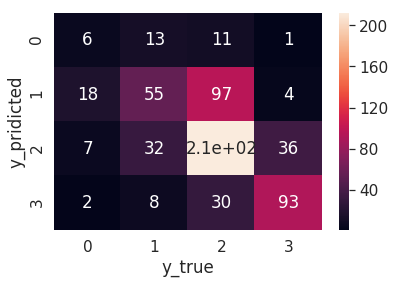

In [0]:
import seaborn as sn
sn.set(font_scale=1.4)#for label size
sn.heatmap(m, annot=True)# font size
plt.xlabel('y_true')
plt.ylabel('y_pridicted')

In [0]:
# Applying Grid Search to find the best model and the best parameters
from sklearn.model_selection import GridSearchCV
parameters = {'bootstrap': [True], 'max_depth': [20, 40], 'max_features': ['auto'], 'n_estimators': [80,100]}
grid_search = GridSearchCV(estimator = classifier, param_grid = parameters,scoring = 'accuracy', cv = 10, n_jobs = -1)
grid_search = grid_search.fit(output_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_


In [0]:
best_parameters

{'bootstrap': True,
 'max_depth': 20,
 'max_features': 'auto',
 'n_estimators': 100}

In [0]:
best_accuracy

0.5914454277286135

In [0]:
classifier = RandomForestClassifier(n_estimators = 80, bootstrap=True,criterion = 'entropy', max_depth=20,max_features='auto',n_jobs=-1)
classifier.fit(output_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=20, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=80, n_jobs=-1,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [0]:
y_pred = classifier.predict(output_test)

In [0]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.15      0.16      0.16        31
           1       0.49      0.29      0.37       174
           2       0.60      0.74      0.67       287
           3       0.67      0.68      0.67       133

    accuracy                           0.57       625
   macro avg       0.48      0.47      0.47       625
weighted avg       0.56      0.57      0.56       625



In [0]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_scaled = sc.fit_transform(output_train)
X_test_scaled = sc.transform(output_test)

In [0]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train_scaled, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=0,
    shrinking=True, tol=0.001, verbose=False)

In [0]:
y_pred = classifier.predict(X_test_scaled)

In [0]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.22      0.06      0.10        31
           1       0.60      0.34      0.43       174
           2       0.60      0.81      0.69       287
           3       0.69      0.67      0.68       133

    accuracy                           0.61       625
   macro avg       0.53      0.47      0.47       625
weighted avg       0.60      0.61      0.59       625



In [0]:
# Applying Grid Search to find the best model and the best parameters
from sklearn.model_selection import GridSearchCV
parameters = [{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
              {'C': [1, 10, 100, 1000], 'kernel': ['rbf'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}]
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search = grid_search.fit(X_train_scaled, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [0]:
best_parameters

{'C': 10, 'kernel': 'linear'}

In [0]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', C=1)
classifier.fit(X_train_scaled, y_train)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [0]:
y_pred = classifier.predict(X_test_scaled)

In [0]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.67      0.19      0.30        31
           1       0.76      0.31      0.44       174
           2       0.58      0.90      0.70       287
           3       0.75      0.56      0.64       133

    accuracy                           0.63       625
   macro avg       0.69      0.49      0.52       625
weighted avg       0.67      0.63      0.60       625

